In [176]:
import pandas as pd
import numpy as np
import matplotlib._pylab_helpers
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
import seaborn as sns
from scipy.stats import skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data =pd.read_csv('IPL_Data.csv')
data
df = pd.DataFrame(data)
df

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka",31.0,India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland",28.0,England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg",26.0,South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.00,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu",26.0,India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi",36.0,India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Gurkeerat Singh Mann,GT,https://sports.ndtv.com/cricket/players/1661-g...,All-Rounder,0.50,Gurkeerat Rupinder Singh,"June 29, 1990 Muktsar, Punjab",31.0,India,Right Handed,...,0.0,97.0,5.0,2/15 v RPS,0.0,0.0,19.40,7.46,15.60,6.0
233,Noor Ahmad,GT,https://sports.ndtv.com/cricket/players/112545...,Bowler,0.30,Noor Ahmad Lakanwal,"January 3, 2005",17.0,Afghanistan,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Darshan Nalkande,GT,https://sports.ndtv.com/cricket/players/110589...,All-Rounder,0.20,Darshan Girish Nalkande,"October 4, 1998 Wardha, Maharashtra",23.0,India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Sai Sudharsan,GT,https://sports.ndtv.com/cricket/players/115302...,All-Rounder,0.20,Bhardwaj Sai Sudharsan,"October 15, 2001",20.0,India,Left Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
data= data.fillna(0)
data['EconomyRate'] = data.EconomyRate.astype(int)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             237 non-null    object 
 1   Team             237 non-null    object 
 2   Url              237 non-null    object 
 3   Type             237 non-null    object 
 4   ValueinCR        237 non-null    float64
 5   Full Name        237 non-null    object 
 6   Born             237 non-null    object 
 7   Age              237 non-null    float64
 8   National Side    237 non-null    object 
 9   Batting Style    237 non-null    object 
 10  Bowling          237 non-null    object 
 11  Sport            237 non-null    object 
 12  MatchPlayed      237 non-null    float64
 13  InningsBatted    237 non-null    float64
 14  NotOuts          237 non-null    float64
 15  RunsScored       237 non-null    float64
 16  HighestInnScore  237 non-null    object 
 17  100s            

In [179]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ValueinCR,237.0,3.695781,4.238092,0.2,0.4,1.90,6.50,17.00
Age,237.0,26.434599,6.221966,0.0,23.0,27.00,30.00,40.00
MatchPlayed,237.0,34.206751,50.033924,0.0,0.0,11.00,50.00,220.00
InningsBatted,237.0,24.274262,43.355897,0.0,0.0,5.00,23.00,208.00
NotOuts,237.0,5.590717,9.992221,0.0,0.0,1.00,7.00,73.00
RunsScored,237.0,511.476793,1135.998059,0.0,0.0,23.00,241.00,6283.00
100s,237.0,0.126582,0.545407,0.0,0.0,0.00,0.00,5.00
50s,237.0,2.835443,7.573533,0.0,0.0,0.00,0.00,50.00
4s,237.0,45.105485,104.596488,0.0,0.0,1.00,18.00,654.00
6s,237.0,19.759494,43.209251,0.0,0.0,0.00,12.00,227.00


In [211]:
waste = df.drop(['Url','Full Name','Born'],axis=1)
waste.head(2)

,Name,Team,Type,ValueinCR,Age,National Side,Batting Style,Bowling,Sport,MatchPlayed,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,Batsman,12.0,31.0,India,Right Handed,Off break,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,All-Rounder,11.5,28.0,England,Right Handed,Leg break,IPL,9.0,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.0,NaN,1.0


In [181]:
waste.notnull()

,Name,Team,Type,ValueinCR,Age,National Side,Batting Style,Bowling,Sport,MatchPlayed,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,True,True,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,False,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
233,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
234,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
235,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [213]:
mumbai= waste[(waste.Team == "MI")]
mumbai.head(2)

,Name,Team,Type,ValueinCR,Age,National Side,Batting Style,Bowling,Sport,MatchPlayed,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
94,Allen,MI,Batsman,16.00,34.0,India,Right Handed,Off break,IPL,213.0,...,0.0,453.0,15.0,4/6 v MI,1.0,0.0,30.2,8.01,22.6,32.0
95,Anmolpreet,MI,Wicket-Keeper,15.25,23.0,India,Left Handed,Left-arm medium,IPL,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
sample = mumbai[mumbai['MatchPlayed'].notna()]

In [184]:
sample.isna().sum()

Name               0
Team               0
Type               0
ValueinCR          0
Age                0
National Side      0
Batting Style      0
Bowling            0
Sport              0
MatchPlayed        0
InningsBatted      0
NotOuts            0
RunsScored         0
HighestInnScore    0
100s               0
50s                0
4s                 0
6s                 0
BattingAVG         1
BattingS/R         0
CatchesTaken       3
StumpingsMade      3
Ducks              0
R/O                0
InningsBowled      3
Overs              3
Maidens            3
RunsConceded       3
Wickets            3
Best               3
3s                 3
5s                 3
BowlingAVG         4
EconomyRate        3
S/R                4
Mtc                3
dtype: int64

In [216]:
sample.columns

Index(['Name', 'Team', 'Type', 'ValueinCR', 'Age', 'National Side',
       'Batting Style', 'Bowling', 'Sport', 'MatchPlayed', 'InningsBatted',
       'NotOuts', 'RunsScored', 'HighestInnScore', '100s', '50s', '4s', '6s',
       'BattingAVG', 'BattingS/R', 'CatchesTaken', 'StumpingsMade', 'Ducks',
       'R/O', 'InningsBowled', 'Overs', 'Maidens', 'RunsConceded', 'Wickets',
       'Best', '3s', '5s', 'BowlingAVG', 'EconomyRate', 'S/R', 'Mtc'],
      dtype='object')

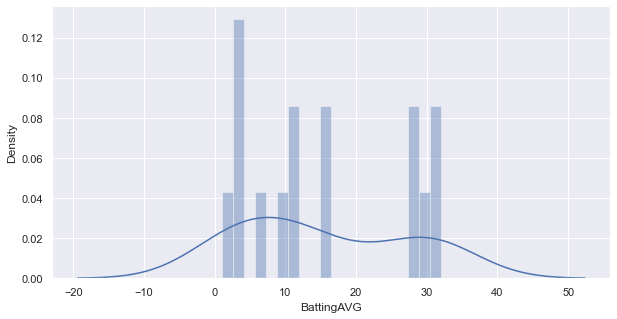

In [185]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['BattingAVG'],bins=20);


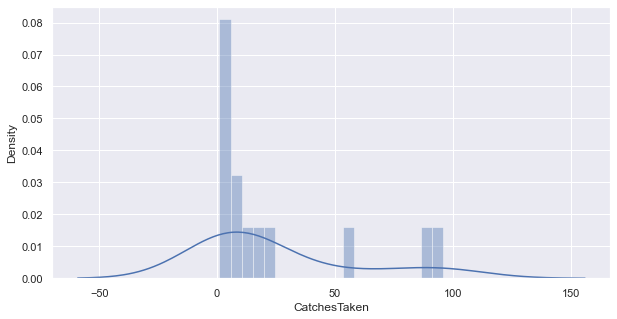

In [186]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['CatchesTaken'],bins=20);

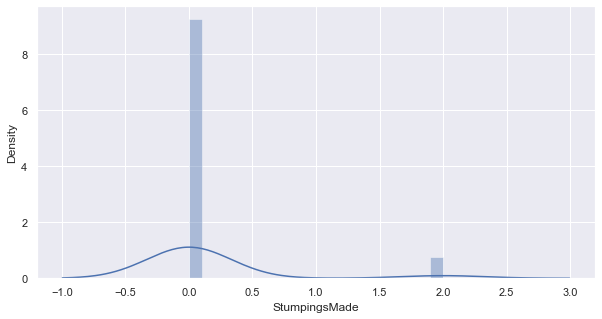

In [187]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['StumpingsMade'],bins=20);

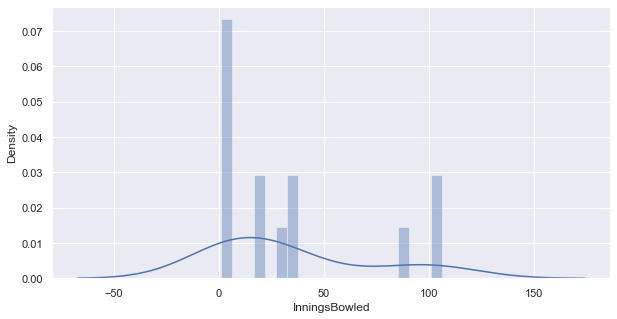

In [188]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['InningsBowled'],bins=20);

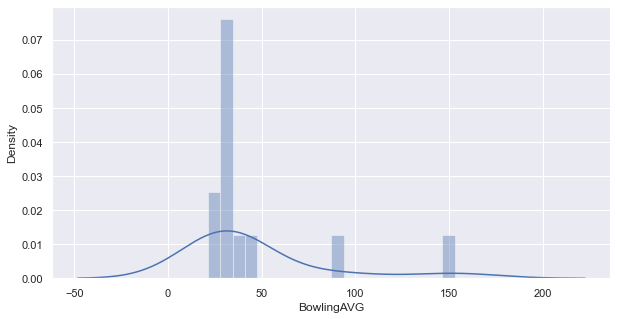

In [189]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['BowlingAVG'],bins=20);

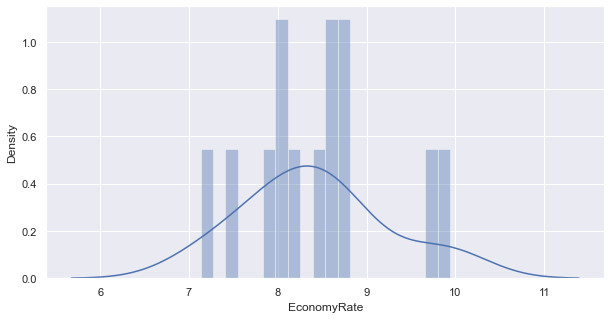

In [190]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['EconomyRate'],bins=20);

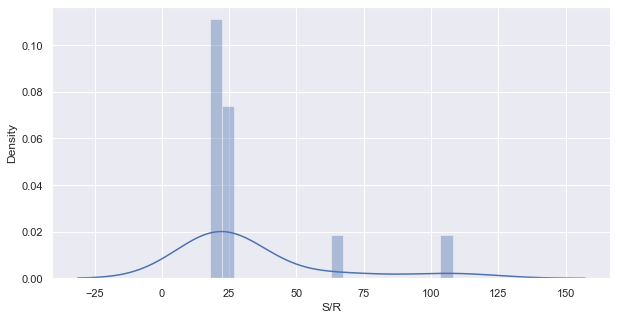

In [191]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['S/R'],bins=20);

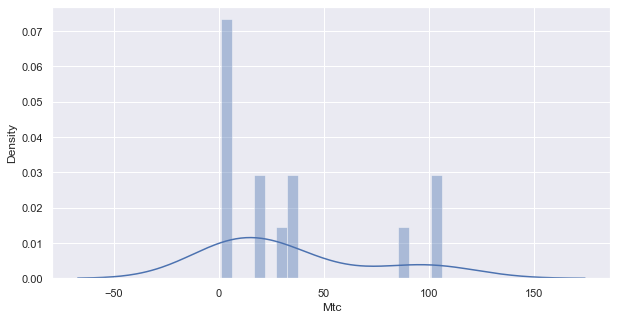

In [192]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(sample['Mtc'],bins=20);

In [193]:
sample['BattingAVG']= sample['BattingAVG'].fillna(sample['BattingAVG'].median())
sample['CatchesTaken']= sample['CatchesTaken'].fillna(sample['CatchesTaken'].median())
sample['StumpingsMade']= sample['StumpingsMade'].fillna(sample['StumpingsMade'].median())
sample['InningsBowled'] = sample['InningsBowled'].fillna(sample['InningsBowled'].median())
sample['BowlingAVG'] = sample['BowlingAVG'].fillna(sample['BowlingAVG'].median())
sample['EconomyRate'] = sample['EconomyRate'].fillna(sample['EconomyRate'].median())
sample['S/R'] = sample['S/R'].fillna(sample['S/R'].median())
sample['Mtc'] = sample['Mtc'].fillna(sample['Mtc'].median())

In [194]:
sample.isna().sum()

Name               0
Team               0
Type               0
ValueinCR          0
Age                0
National Side      0
Batting Style      0
Bowling            0
Sport              0
MatchPlayed        0
InningsBatted      0
NotOuts            0
RunsScored         0
HighestInnScore    0
100s               0
50s                0
4s                 0
6s                 0
BattingAVG         0
BattingS/R         0
CatchesTaken       0
StumpingsMade      0
Ducks              0
R/O                0
InningsBowled      0
Overs              3
Maidens            3
RunsConceded       3
Wickets            3
Best               3
3s                 3
5s                 3
BowlingAVG         0
EconomyRate        0
S/R                0
Mtc                0
dtype: int64

In [195]:
sample.shape

(16, 36)

<AxesSubplot:xlabel='Type'>

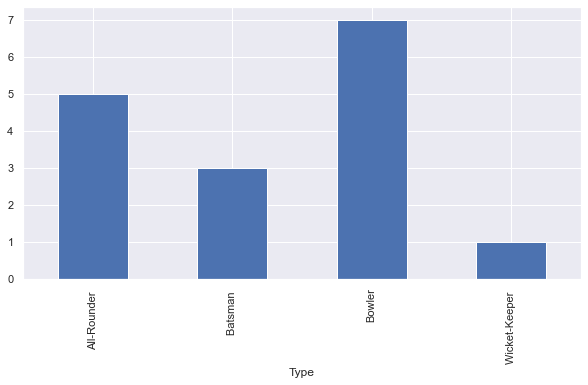

In [196]:
sample.groupby('Type').size().plot(kind='bar')

<AxesSubplot:ylabel='None'>

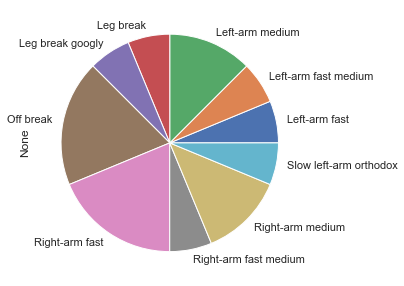

In [197]:
sample.groupby('Bowling').size().plot(kind='pie')

<function matplotlib.pyplot.show(close=None, block=None)>

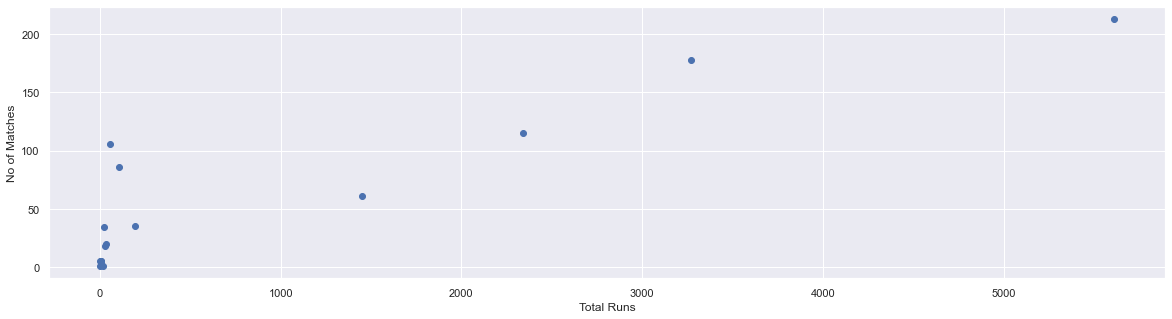

In [198]:
plt.figure(figsize=(20,5))
plt.scatter(sample['RunsScored'], sample['MatchPlayed'])
plt.xlabel('Total Runs')
plt.ylabel('No of Matches')
plt.show

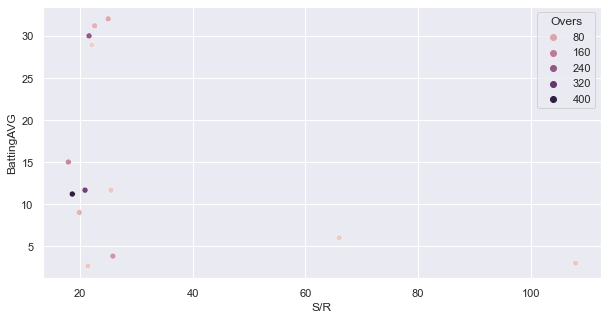

In [199]:
sns.scatterplot(x='S/R',y='BattingAVG',data = sample,hue='Overs')
plt.show()

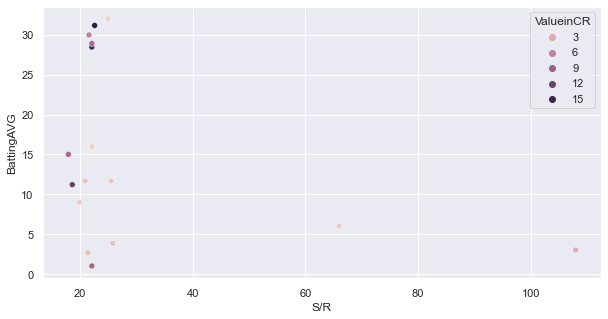

In [200]:
sns.scatterplot(x='S/R',y='BattingAVG',data = sample,hue='ValueinCR')
plt.show()

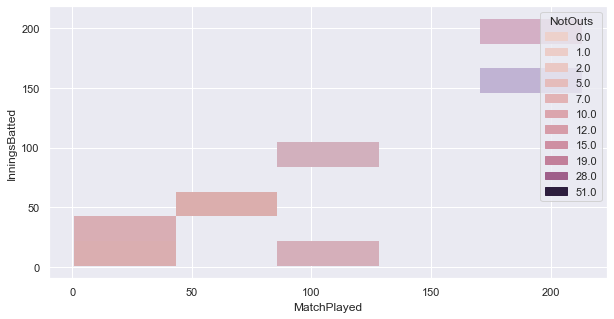

In [201]:
sns.histplot(x='MatchPlayed',y='InningsBatted',data = sample,hue='NotOuts')
plt.show()

In [202]:
#sns.pairplot(sample, hue ="EconomyRate")

<AxesSubplot:>

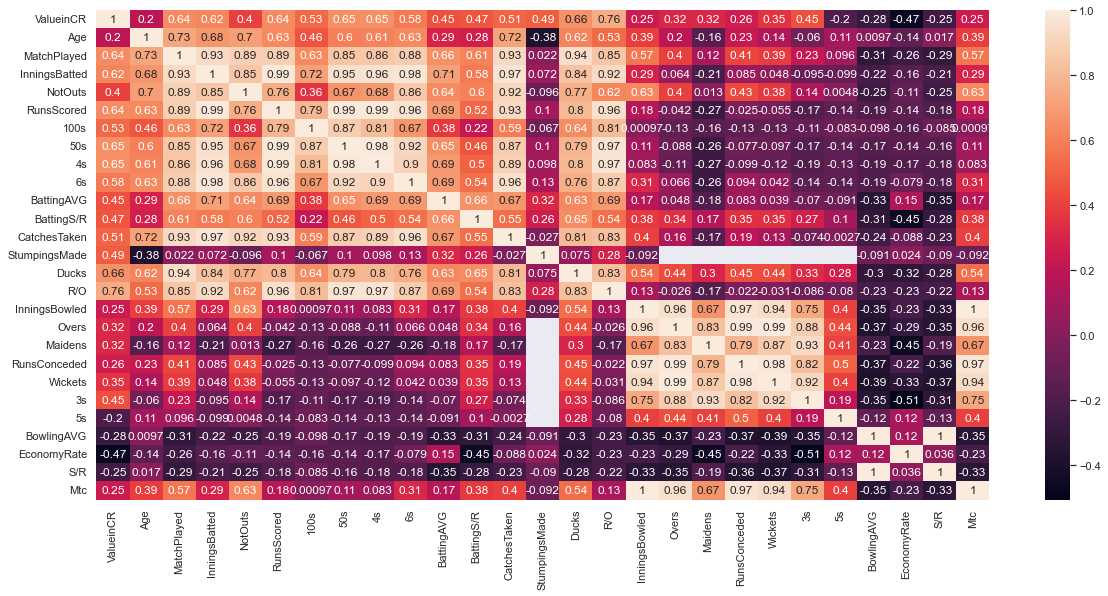

In [218]:
cor = sample.corr()
plt.figure(figsize=(20,9))
sns.heatmap(cor, annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

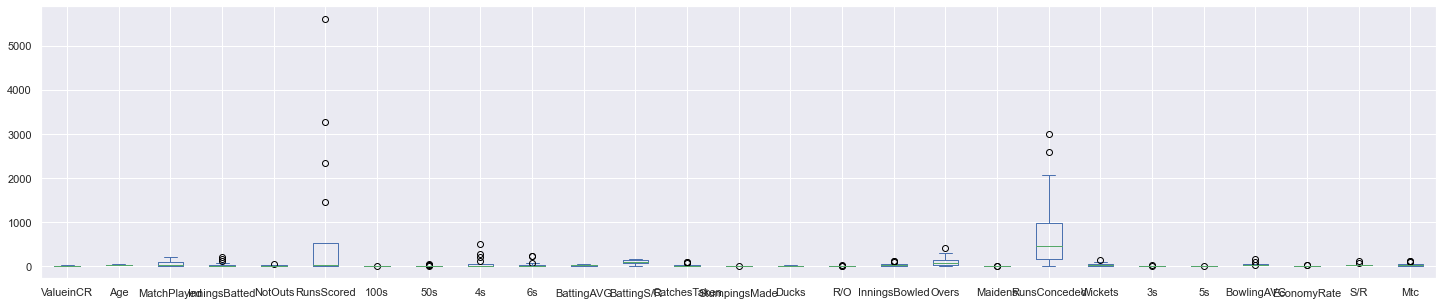

In [204]:
plt.rcParams["figure.figsize"] = (25,5)
sample.plot(kind='box')
plt.show

<AxesSubplot:xlabel='CatchesTaken'>

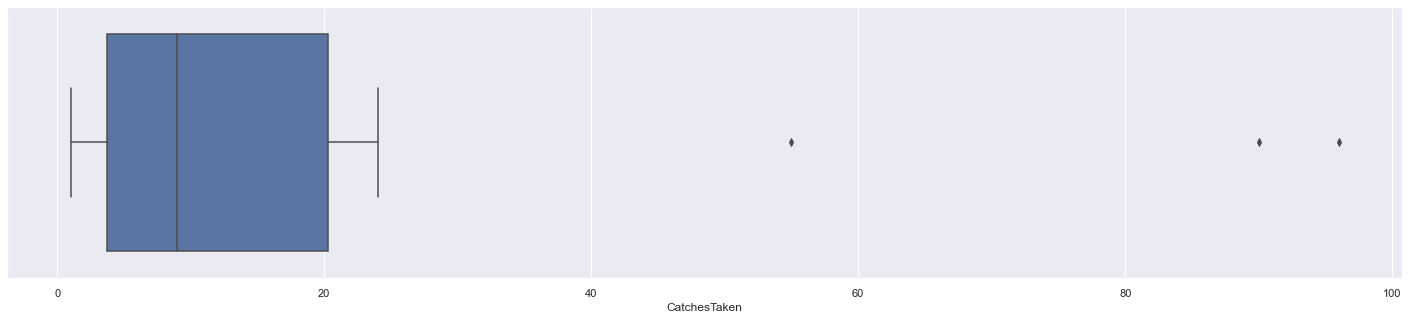

In [205]:
sns.boxplot(sample['CatchesTaken'])

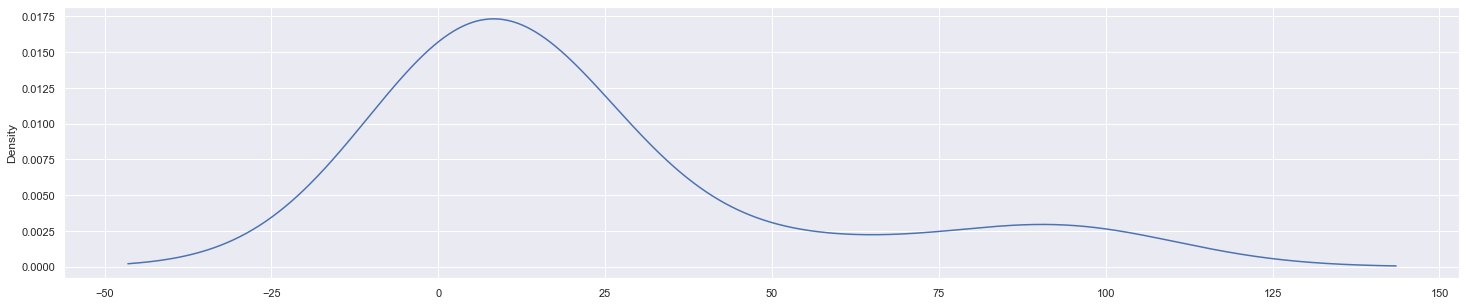

In [206]:
plt.figure()
sample['CatchesTaken'].plot(kind = 'density')
plt.show()

In [219]:
#for col in sample:
 #   print (col)
  #  print (skew(sample[col]))
    
   # plt.figure()
    #sns.distplot(sample['CatchesTaken'])
    #plt.show

In [ ]:
def filter_outliers(sample,variable):
    q1 = np.quantile(sample[variable],0.25)
    q3 = np.quantile(sample[variable],0.75)
    med = np.median(sample[variable])
    iqr = q3-q1
    upperbound = q3+(1.5*iqr)
    lowerbound = q1-(1.5*iqr)
    print(upperbound,lowerbound,iqr)
    return sample[(sample[variable]<lowerbound) | (sample[variable]>upperbound)]

In [ ]:
filter_outliers(sample,"InningsBatted")

73.625 -39.375 28.25


,Name,Team,Type,ValueinCR,Age,National Side,Batting Style,Bowling,Sport,MatchPlayed,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
94,Allen,MI,Batsman,16.0,34.0,India,Right Handed,Off break,IPL,213.0,...,0.0,453.0,15.0,4/6 v MI,1.0,0.0,30.200,8.01,22.6,32.0
99,Basil,MI,Batsman,8.0,31.0,India,Right Handed,Right-arm medium,IPL,115.0,...,0.0,8.0,0.0,0/8 v DC,0.0,0.0,31.105,8.00,22.1,1.0
100,Bumrah,MI,All-Rounder,6.0,34.0,West Indies,Right Handed,Right-arm medium,IPL,178.0,...,0.0,2055.0,65.0,4/44 v RR,2.0,0.0,31.610,8.78,21.6,20.0


In [ ]:
sample.columns

Index(['Name', 'Team', 'Type', 'ValueinCR', 'Age', 'National Side',
       'Batting Style', 'Bowling', 'Sport', 'MatchPlayed', 'InningsBatted',
       'NotOuts', 'RunsScored', 'HighestInnScore', '100s', '50s', '4s', '6s',
       'BattingAVG', 'BattingS/R', 'CatchesTaken', 'StumpingsMade', 'Ducks',
       'R/O', 'InningsBowled', 'Overs', 'Maidens', 'RunsConceded', 'Wickets',
       'Best', '3s', '5s', 'BowlingAVG', 'EconomyRate', 'S/R', 'Mtc'],
      dtype='object')

<AxesSubplot:xlabel='EconomyRate'>

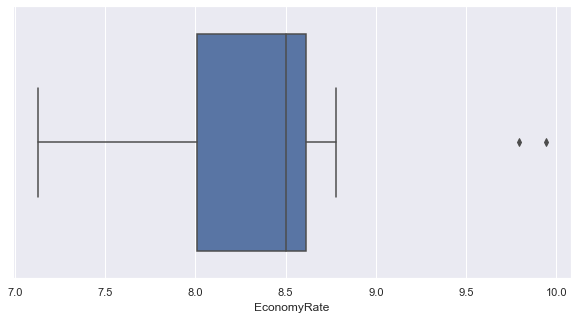

In [ ]:
sns.boxplot(sample['EconomyRate'])

In [ ]:
median = sample.loc[sample['Mtc']<75, 'Mtc'].median()
sample.loc[sample.Mtc > 75, 'Mtc'] = np.nan
sample.fillna(median,inplace=True)

<AxesSubplot:xlabel='Mtc'>

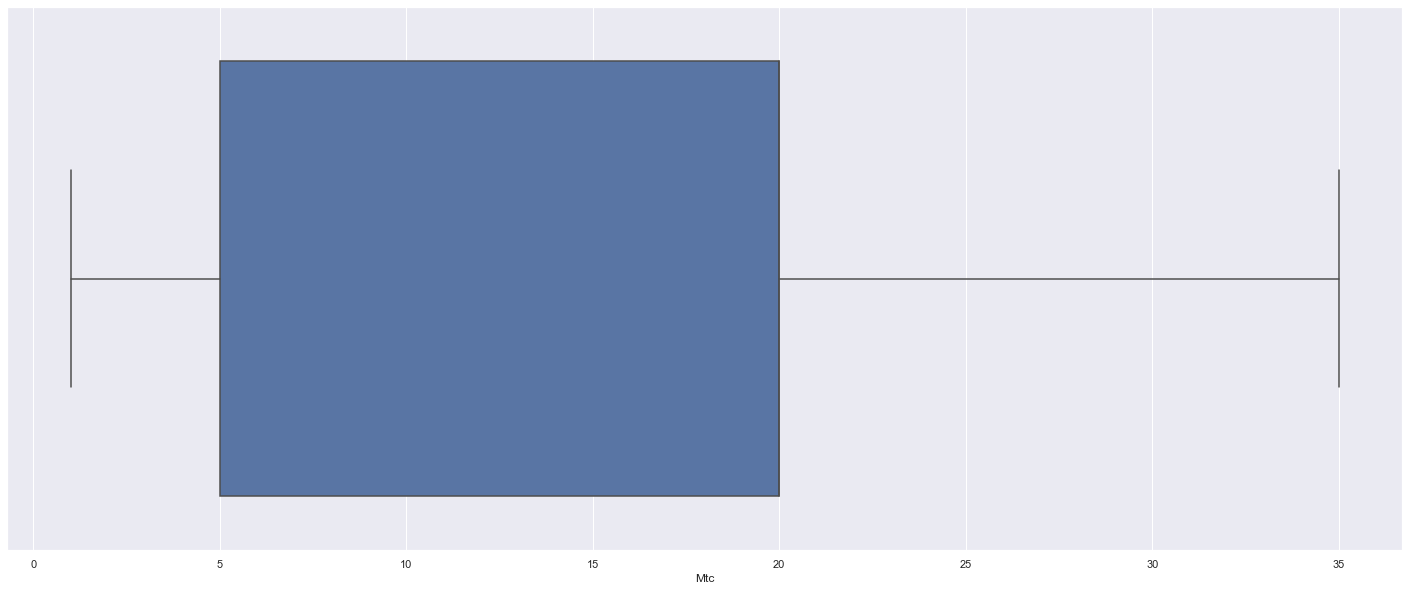

In [ ]:
sns.boxplot(sample['Mtc'])

<function matplotlib.pyplot.show(close=None, block=None)>

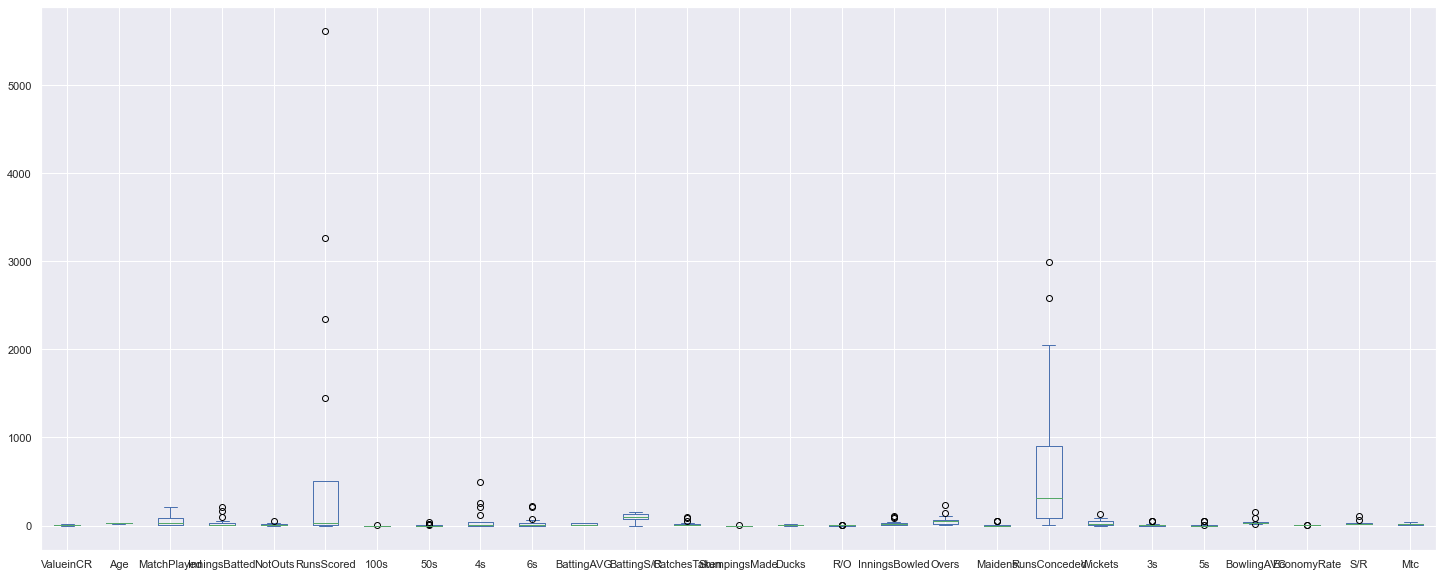

In [ ]:
plt.rcParams["figure.figsize"] = (25,10)
sample.plot(kind='box')
plt.show

In [ ]:
def clear_outliers (col):
    Q3, Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR
    return upperbound, lowerbound
    

In [220]:
#for column in sample.columns:
 #   if sample[column].dtypes != 'object':
  #      upperbound , lowerbound = clear_outliers(sample(column))
   #     df[column] = np.where((sample[column] > upperbound) | (sample[column] < lowerbound), np.nan, sample[column])


In [ ]:
#median = sample.loc[sample['EconomyRate']]

In [ ]:
def filter_outliers(sample,variable):
    q1 = np.quantile(sample[variable],0.25)
    q3 = np.quantile(sample[variable],0.75)
    med = np.median(sample[variable])
    iqr = q3-q1
    upperbound = q3+(1.5*iqr)
    lowerbound = q1-(1.5*iqr)
    print(upperbound,lowerbound,iqr)
    return sample[(sample[variable]>lowerbound) & (sample[variable]<upperbound)]
filter_outliers(sample,'RunsScored')

33.125 -7.875 10.25


,Name,Team,Type,ValueinCR,Age,National Side,Batting Style,Bowling,Sport,MatchPlayed,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
94,Allen,MI,Batsman,16.00,34.0,India,Right Handed,Off break,IPL,213.0,...,0.0,453.0,15.0,4/6 v MI,1.0,0.0,30.200,8.01,22.60,32.0
95,Anmolpreet,MI,Wicket-Keeper,15.25,23.0,India,Left Handed,Left-arm medium,IPL,61.0,...,12.0,12.0,12.0,12.0,12.0,12.0,31.105,8.50,22.10,20.0
97,Arshad Khan,MI,All-Rounder,8.25,26.0,Singapore,Right Handed,Off break,IPL,1.0,...,12.0,12.0,12.0,12.0,12.0,12.0,31.105,8.50,22.10,20.0
98,Aryan Juyal,MI,All-Rounder,8.00,26.0,England,Right Handed,Right-arm fast,IPL,35.0,...,2.0,981.0,46.0,3/15 v PBKS,6.0,0.0,21.320,7.13,17.93,35.0
99,Basil,MI,Batsman,8.00,31.0,India,Right Handed,Right-arm medium,IPL,115.0,...,0.0,8.0,0.0,0/8 v DC,0.0,0.0,31.105,8.00,22.10,1.0
100,Bumrah,MI,All-Rounder,6.00,34.0,West Indies,Right Handed,Right-arm medium,IPL,178.0,...,0.0,2055.0,65.0,4/44 v RR,2.0,0.0,31.610,8.78,21.60,101.0
102,Ishan,MI,All-Rounder,2.60,29.0,Australia,Right Handed,Left-arm fast medium,IPL,5.0,...,0.0,153.0,1.0,1/24 v PBKS,0.0,0.0,153.000,8.50,108.00,5.0
104,Jofra,MI,Bowler,1.60,31.0,India,Right Handed,Leg break googly,IPL,34.0,...,0.0,881.0,26.0,3/21 v RCB,2.0,0.0,33.880,7.86,25.84,34.0
105,Markande,MI,Bowler,1.50,29.0,England,Right Handed,Left-arm fast,IPL,5.0,...,0.0,153.0,5.0,2/31 v KKR,0.0,0.0,30.600,8.57,21.40,5.0
106,Murugan,MI,Bowler,1.30,30.0,India,Right Handed,Left-arm medium,IPL,86.0,...,3.0,2588.0,85.0,5/25 v DC,5.0,2.0,30.440,8.74,20.89,85.0


In [ ]:
shortlist = sample.drop(['Name','Team','Sport','Best'],axis=1)
shortlist

,Type,ValueinCR,Age,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,RunsScored,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
94,Batsman,16.00,34.0,India,Right Handed,Off break,213.0,208.0,28.0,12.0,...,56.3,0.0,453.0,15.0,1.0,0.0,30.200,8.01,22.60,32.0
95,Wicket-Keeper,15.25,23.0,India,Left Handed,Left-arm medium,61.0,56.0,5.0,12.0,...,12.0,12.0,12.0,12.0,12.0,12.0,31.105,8.50,22.10,20.0
96,Bowler,12.00,28.0,India,Right Handed,Right-arm fast,106.0,20.0,15.0,56.0,...,403.4,5.0,2997.0,130.0,14.0,0.0,23.050,7.42,18.63,106.0
97,All-Rounder,8.25,26.0,Singapore,Right Handed,Off break,1.0,1.0,0.0,1.0,...,12.0,12.0,12.0,12.0,12.0,12.0,31.105,8.50,22.10,20.0
98,All-Rounder,8.00,26.0,England,Right Handed,Right-arm fast,35.0,23.0,10.0,12.0,...,137.3,2.0,981.0,46.0,6.0,0.0,21.320,7.13,17.93,35.0
99,Batsman,8.00,31.0,India,Right Handed,Right-arm medium,115.0,100.0,19.0,12.0,...,1.0,0.0,8.0,0.0,0.0,0.0,31.105,8.00,22.10,1.0
100,All-Rounder,6.00,34.0,West Indies,Right Handed,Right-arm medium,178.0,160.0,51.0,12.0,...,234.0,0.0,2055.0,65.0,2.0,0.0,31.610,8.78,21.60,101.0
102,All-Rounder,2.60,29.0,Australia,Right Handed,Left-arm fast medium,5.0,3.0,1.0,6.0,...,18.0,0.0,153.0,1.0,0.0,0.0,153.000,8.50,108.00,5.0
104,Bowler,1.60,31.0,India,Right Handed,Leg break googly,34.0,8.0,2.0,23.0,...,112.0,0.0,881.0,26.0,2.0,0.0,33.880,7.86,25.84,34.0
105,Bowler,1.50,29.0,England,Right Handed,Left-arm fast,5.0,3.0,0.0,8.0,...,17.5,0.0,153.0,5.0,0.0,0.0,30.600,8.57,21.40,5.0


In [224]:
shortlist.columns

Index(['ValueinCR', 'Age', 'MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled',
       'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc', 'Type', 'National Side', 'Batting Style',
       'Bowling', 'HighestInnScore'],
      dtype='object')

In [ ]:
shortlist.fillna(0)
shortlist['EconomyRate'] = shortlist.EconomyRate.astype(int)

In [ ]:
shortlist.dtypes.tail(20)

50s              float64
4s               float64
6s               float64
BattingAVG       float64
BattingS/R       float64
CatchesTaken     float64
StumpingsMade    float64
Ducks            float64
R/O              float64
InningsBowled    float64
Overs            float64
Maidens          float64
RunsConceded     float64
Wickets          float64
3s               float64
5s               float64
BowlingAVG       float64
EconomyRate        int32
S/R              float64
Mtc              float64
dtype: object

In [ ]:
shortlist['Overs'] = shortlist['Overs'].fillna(shortlist['Overs'].median())
shortlist['Maidens'] = shortlist['Maidens'].fillna(shortlist['Maidens'].median())
shortlist['RunsConceded'] = shortlist['RunsConceded'].fillna(shortlist['RunsConceded'].median())

In [221]:
shortlist.isna().sum()

ValueinCR          0
Age                0
MatchPlayed        0
InningsBatted      0
NotOuts            0
RunsScored         0
100s               0
50s                0
4s                 0
6s                 0
BattingAVG         0
BattingS/R         0
CatchesTaken       0
StumpingsMade      0
Ducks              0
R/O                0
InningsBowled      0
Overs              0
Maidens            0
RunsConceded       0
Wickets            0
3s                 0
5s                 0
BowlingAVG         0
EconomyRate        0
S/R                0
Mtc                0
Type               0
National Side      0
Batting Style      0
Bowling            0
HighestInnScore    0
dtype: int64

In [ ]:
# To change the Categorical to numerical feature in Type
le2 = LabelEncoder()
label2 = le2.fit_transform(shortlist['Type'])
# To Drop the categorical feature
shortlist = shortlist.drop("Type", axis='columns')
# after dropping the categorical feature to reassign same converted numerical feature
shortlist["Type"] = label2
shortlist.head(2)

,ValueinCR,Age,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,RunsScored,HighestInnScore,...,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,Type
94,16.00,34.0,India,Right Handed,Off break,213.0,208.0,28.0,12.0,109* v KKR,...,0.0,453.0,15.0,1.0,0.0,30.200,8,22.6,32.0,1
95,15.25,23.0,India,Left Handed,Left-arm medium,61.0,56.0,5.0,12.0,99 v RCB,...,12.0,12.0,12.0,12.0,12.0,31.105,8,22.1,20.0,3


In [ ]:
le2.classes_

array(['All-Rounder ', 'Batsman ', 'Bowler', 'Wicket-Keeper '],
      dtype=object)

In [ ]:
# To change the Categorical to numerical feature in Type
le3 = LabelEncoder()
label3 = le3.fit_transform(shortlist['National Side'])
# To Drop the categorical feature
shortlist = shortlist.drop("National Side", axis='columns')
# after dropping the categorical feature to reassign same converted numerical feature
shortlist["National Side"] = label3
shortlist.head(2)

,ValueinCR,Age,Batting Style,Bowling,MatchPlayed,InningsBatted,NotOuts,RunsScored,HighestInnScore,100s,...,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,Type,National Side
94,16.00,34.0,Right Handed,Off break,213.0,208.0,28.0,12.0,109* v KKR,1.0,...,453.0,15.0,1.0,0.0,30.200,8,22.6,32.0,1,2
95,15.25,23.0,Left Handed,Left-arm medium,61.0,56.0,5.0,12.0,99 v RCB,0.0,...,12.0,12.0,12.0,12.0,31.105,8,22.1,20.0,3,2


In [ ]:
# To change the Categorical to numerical feature in Type
le4 = LabelEncoder()
label4 = le4.fit_transform(shortlist['Batting Style'])
# To Drop the categorical feature
shortlist = shortlist.drop("Batting Style", axis='columns')
# after dropping the categorical feature to reassign same converted numerical feature
shortlist["Batting Style"] = label4
shortlist.head(2)

,ValueinCR,Age,Bowling,MatchPlayed,InningsBatted,NotOuts,RunsScored,HighestInnScore,100s,50s,...,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,Type,National Side,Batting Style
94,16.00,34.0,Off break,213.0,208.0,28.0,12.0,109* v KKR,1.0,40.0,...,15.0,1.0,0.0,30.200,8,22.6,32.0,1,2,1
95,15.25,23.0,Left-arm medium,61.0,56.0,5.0,12.0,99 v RCB,0.0,9.0,...,12.0,12.0,12.0,31.105,8,22.1,20.0,3,2,0


In [ ]:
# To change the Categorical to numerical feature in Type
le5 = LabelEncoder()
label5 = le5.fit_transform(shortlist['Bowling'])
# To Drop the categorical feature
shortlist = shortlist.drop("Bowling", axis='columns')
# after dropping the categorical feature to reassign same converted numerical feature
shortlist["Bowling"] = label5
shortlist.head(2)

,ValueinCR,Age,MatchPlayed,InningsBatted,NotOuts,RunsScored,HighestInnScore,100s,50s,4s,...,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,Type,National Side,Batting Style,Bowling
94,16.00,34.0,213.0,208.0,28.0,12.0,109* v KKR,1.0,40.0,491.0,...,1.0,0.0,30.200,8,22.6,32.0,1,2,1,5
95,15.25,23.0,61.0,56.0,5.0,12.0,99 v RCB,0.0,9.0,121.0,...,12.0,12.0,31.105,8,22.1,20.0,3,2,0,2


In [ ]:
# To change the Categorical to numerical feature in Type
le6 = LabelEncoder()
label6 = le6.fit_transform(shortlist['HighestInnScore'])
# To Drop the categorical feature
shortlist = shortlist.drop("HighestInnScore", axis='columns')
# after dropping the categorical feature to reassign same converted numerical feature
shortlist["HighestInnScore"] = label6
shortlist.head(2)

,ValueinCR,Age,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,...,5s,BowlingAVG,EconomyRate,S/R,Mtc,Type,National Side,Batting Style,Bowling,HighestInnScore
94,16.00,34.0,213.0,208.0,28.0,12.0,1.0,40.0,491.0,227.0,...,0.0,30.200,8,22.6,32.0,1,2,1,5,2
95,15.25,23.0,61.0,56.0,5.0,12.0,0.0,9.0,121.0,74.0,...,12.0,31.105,8,22.1,20.0,3,2,0,2,14


In [ ]:
#data['EconomyRate'] = data.EconomyRate.astype(int)
data= data.fillna(0)
data['EconomyRate'] = data.EconomyRate.astype(int)

In [ ]:
shortlist['EconomyRate'].dtypes

dtype('int32')

In [ ]:
shortlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 94 to 114
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ValueinCR        16 non-null     float64
 1   Age              16 non-null     float64
 2   MatchPlayed      16 non-null     float64
 3   InningsBatted    16 non-null     float64
 4   NotOuts          16 non-null     float64
 5   RunsScored       16 non-null     float64
 6   100s             16 non-null     float64
 7   50s              16 non-null     float64
 8   4s               16 non-null     float64
 9   6s               16 non-null     float64
 10  BattingAVG       16 non-null     float64
 11  BattingS/R       16 non-null     float64
 12  CatchesTaken     16 non-null     float64
 13  StumpingsMade    16 non-null     float64
 14  Ducks            16 non-null     float64
 15  R/O              16 non-null     float64
 16  InningsBowled    16 non-null     float64
 17  Overs           

In [ ]:
np.any(np.isnan(shortlist))
np.all(np.isfinite(shortlist))

True

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [ ]:
X = shortlist.iloc[:,0:-1]
y = shortlist["EconomyRate"]

In [ ]:
mic = SelectKBest(score_func= mutual_info_classif,k=10)

In [ ]:
shortlist.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
shortlist['Wickets'] = shortlist['Wickets'].fillna(shortlist['Wickets'].median())
shortlist['3s'] = shortlist['3s'].fillna(shortlist['3s'].median())
shortlist['5s'] = shortlist['5s'].fillna(shortlist['5s'].median())

In [ ]:
mic.fit(X,y)
feature_MI_score = pd.Series(mic.scores_,index=X.columns)
feature_MI_score.sort_values(ascending=False)

Batting Style    0.732093
EconomyRate      0.679563
R/O              0.492063
5s               0.417361
BowlingAVG       0.297143
S/R              0.219346
Type             0.137455
InningsBatted    0.114184
CatchesTaken     0.058507
100s             0.055776
Overs            0.026516
RunsScored       0.002387
MatchPlayed      0.002079
RunsConceded     0.000474
National Side    0.000000
3s               0.000000
Wickets          0.000000
Mtc              0.000000
ValueinCR        0.000000
Maidens          0.000000
InningsBowled    0.000000
Age              0.000000
Ducks            0.000000
StumpingsMade    0.000000
BattingS/R       0.000000
BattingAVG       0.000000
6s               0.000000
4s               0.000000
50s              0.000000
NotOuts          0.000000
Bowling          0.000000
dtype: float64

In [ ]:
shortlist_mic = mic.fit_transform(X,y)

In [ ]:
shortlist_mic.shape

(16, 10)

In [ ]:
shortlist_mic.plot.bar(figsize = (16,5))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
x = shortlist.drop('EconomyRate',axis=1)
y = shortlist['EconomyRate']

x.shape, y.shape


((16, 31), (16,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Remove constant, quasi constant, and duplicate features

In [ ]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)


In [ ]:
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T

In [ ]:
x_train_T

array([[6.50000000e-01, 1.00000000e+00, 1.60000000e+00, 1.50000000e+00,
        1.20000000e+01, 2.00000000e-01, 8.00000000e+00, 2.60000000e+00,
        1.30000000e+00, 7.50000000e-01, 8.25000000e+00, 6.00000000e+00],
       [2.40000000e+01, 2.50000000e+01, 3.10000000e+01, 2.90000000e+01,
        2.80000000e+01, 2.30000000e+01, 2.60000000e+01, 2.90000000e+01,
        3.00000000e+01, 2.60000000e+01, 2.60000000e+01, 3.40000000e+01],
       [1.80000000e+01, 5.00000000e+00, 3.40000000e+01, 5.00000000e+00,
        1.06000000e+02, 1.00000000e+00, 3.50000000e+01, 5.00000000e+00,
        8.60000000e+01, 4.00000000e+00, 1.00000000e+00, 1.78000000e+02],
       [8.00000000e+00, 1.00000000e+00, 8.00000000e+00, 3.00000000e+00,
        2.00000000e+01, 1.00000000e+00, 2.30000000e+01, 3.00000000e+00,
        2.10000000e+01, 3.00000000e+00, 1.00000000e+00, 1.60000000e+02],
       [5.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 0.00000000e+00, 1.00000000e+01, 1.00

In [ ]:
x_train_T,x_test_T = pd.DataFrame(x_train_T),pd.DataFrame(x_test_T)
#x_test_T = pd.DataFrame(x_test_T)

In [ ]:
x_train_T.duplicated().sum()

0

In [ ]:
duplicated_features = x_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]

In [ ]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [ ]:
x_train_unique.shape, x_test_unique.shape

((12, 28), (4, 28))

In [ ]:
shortlist.columns

Index(['ValueinCR', 'Age', 'MatchPlayed', 'InningsBatted', 'NotOuts',
       'RunsScored', '100s', '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'CatchesTaken', 'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled',
       'Overs', 'Maidens', 'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc', 'Type', 'National Side', 'Batting Style',
       'Bowling', 'HighestInnScore'],
      dtype='object')

In [ ]:
#shortlist['Overs'].isnull().sum()
shortlist['ValueinCR'].isnull().values.any()

False

In [ ]:

shortlist.isnull().sum().sum()

0

In [ ]:
x_train_unique

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.65,24.0,18.0,8.0,5.0,27.0,0.0,3.0,0.0,9.000000,...,16.0,1.0,0.0,28.31,19.870000,18.000000,2.0,2.0,3.0,10.0
1,1.00,25.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,15.324667,...,4.0,0.0,0.0,42.25,25.500000,5.000000,2.0,0.0,6.0,0.0
2,1.60,31.0,34.0,8.0,2.0,23.0,0.0,1.0,0.0,3.830000,...,26.0,2.0,0.0,33.88,25.840000,34.000000,2.0,2.0,4.0,13.0
3,1.50,29.0,5.0,3.0,0.0,8.0,0.0,0.0,1.0,2.660000,...,5.0,0.0,0.0,30.60,21.400000,5.000000,2.0,1.0,0.0,9.0
4,12.00,28.0,106.0,20.0,15.0,56.0,0.0,4.0,1.0,11.200000,...,130.0,14.0,0.0,23.05,18.630000,20.000000,2.0,2.0,6.0,5.0
5,0.20,23.0,1.0,1.0,0.0,16.0,0.0,2.0,1.0,16.000000,...,20.0,20.0,20.0,46.29,32.771667,34.615385,1.0,2.0,5.0,4.0
6,8.00,26.0,35.0,23.0,10.0,195.0,0.0,11.0,14.0,15.000000,...,46.0,6.0,0.0,21.32,17.930000,35.000000,0.0,1.0,6.0,7.0
7,2.60,29.0,5.0,3.0,1.0,6.0,0.0,0.0,0.0,3.000000,...,1.0,0.0,0.0,153.00,108.000000,5.000000,0.0,0.0,1.0,8.0
8,1.30,30.0,86.0,21.0,12.0,105.0,0.0,9.0,3.0,11.660000,...,85.0,5.0,2.0,30.44,20.890000,20.000000,2.0,2.0,2.0,6.0
9,0.75,26.0,4.0,3.0,2.0,6.0,0.0,0.0,0.0,6.000000,...,1.0,0.0,0.0,90.00,66.000000,3.000000,0.0,4.0,9.0,9.0


In [ ]:
mi = mutual_info_classif(x_train_unique,y_train)
len(mi)

28

In [ ]:
mi

array([0.05577201, 0.        , 0.10364358, 0.18405483, 0.09314574,
       0.04303752, 0.10678211, 0.01576479, 0.        , 0.        ,
       0.        , 0.21295094, 0.        , 0.43113276, 0.        ,
       0.08344156, 0.        , 0.07435065, 0.01071429, 0.00818903,
       0.09476912, 0.13481241, 0.09314574, 0.07204185, 0.        ,
       0.        , 0.05992063, 0.        ])

In [ ]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns

In [ ]:
mi.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

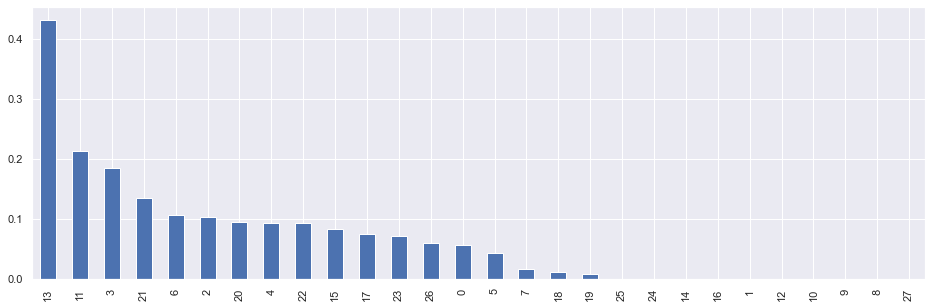

In [ ]:
mi.plot.bar(figsize = (16,5))

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=5).fit(x_train_unique,y_train)

In [ ]:
x_train_unique.column[sel.get_support()]

AttributeError: 'DataFrame' object has no attribute 'column'

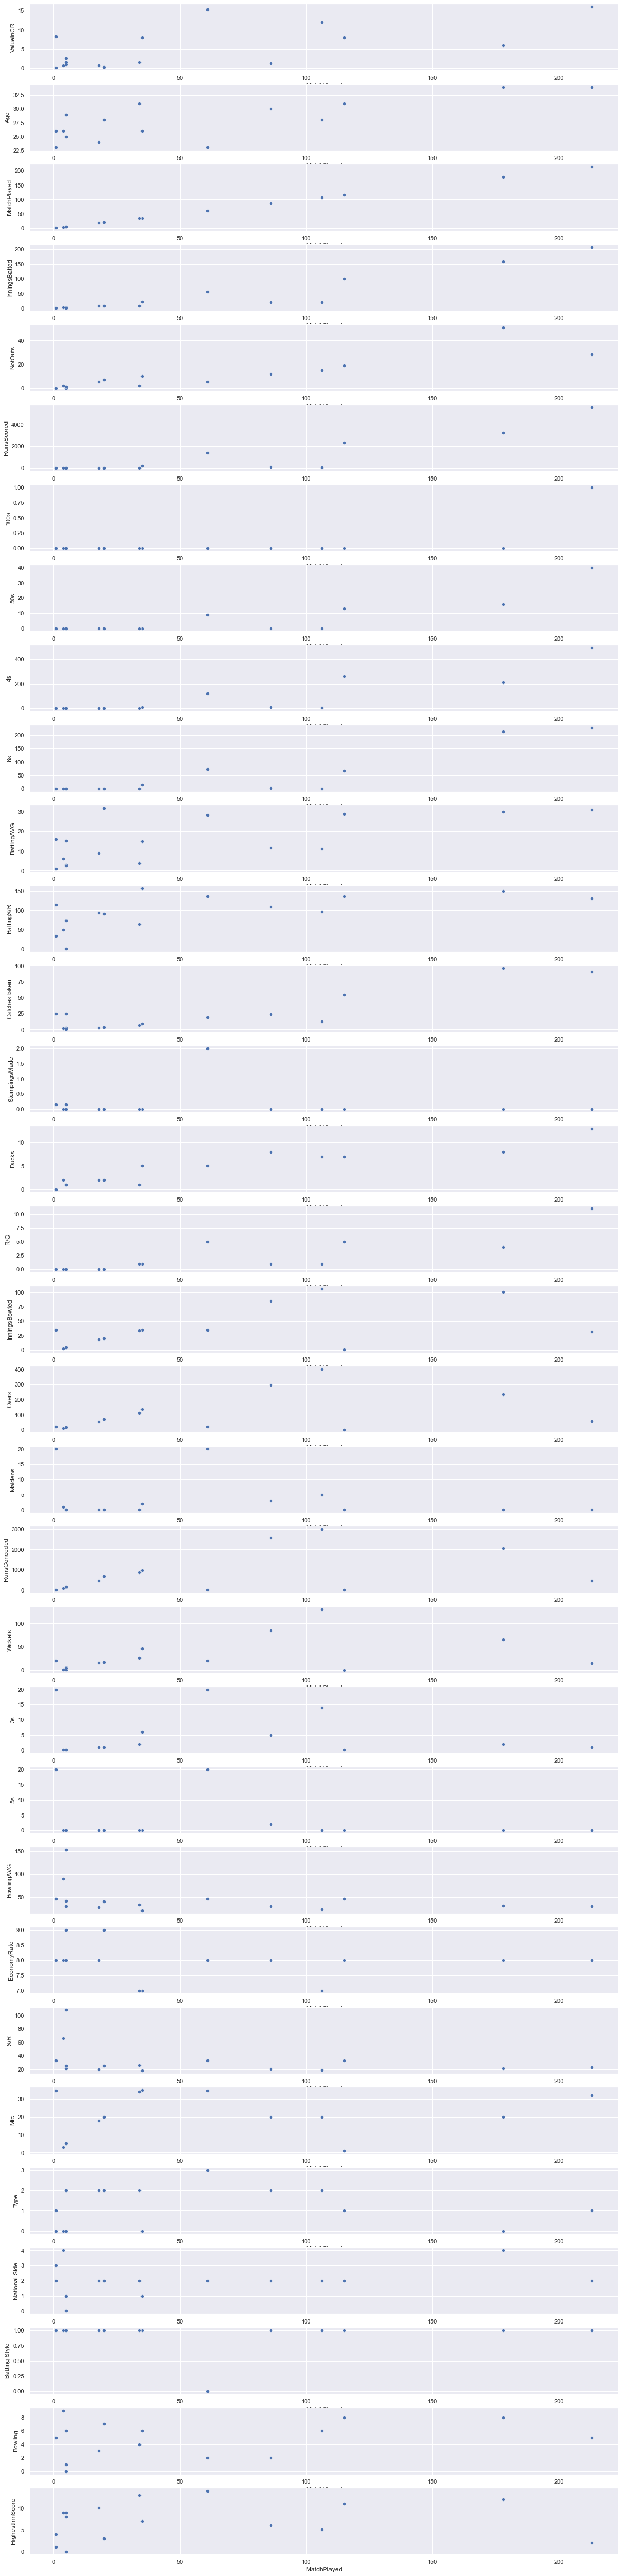

In [ ]:
count=2
plt.subplots(figsize=(20,100))
for i in shortlist.columns:
    plt.subplot(36,1,count)
    sns.scatterplot(shortlist["MatchPlayed"],shortlist[i])
    count+=1
plt.show()